# Measuring the probability distributions of Rydberg Hamiltonians
We know what the different topological phases are for different variations of the Hamiltonian at the ground state.
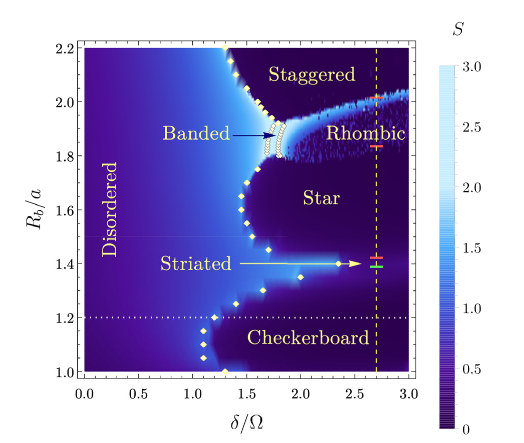

https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.124.103601

My goal is to explore this at different temperatures. In particular, we want to find a way to differentiate between temperatures.

When we make a measurement from the quantum computer or qmc on the rydberg atom array, we will obtain a sequence of 0s and 1s, with one digit corresopnding to each atom. If we represent a single sequence of 1s and 0s as the vector $\mathbf{x}$, then we would like to know what the probability distribution of the data is $p(\mathbf{x})$.

In the case of a 16x16 atom array, there are $2^{256}$ different possible states, though not all of them are reasonably likely. If we assume that there are $N$ equally probable states, if we were to sample $k$ times then the probability of none of them having the state is:

$$P(\text{unique states})=\frac{N!}{(N-k)!k^N}\approx\frac{(N/e)^N}{((N-k)/e)^{N-k} k^N}=\left(\frac{1}{(1-k/N)k}\right)^N=\frac{1}{k^Ne^{N \ln(1-k/N)}}\approx\frac{e^{k}}{k^N}$$
For a 16x16 array, we take $N=2^{256}$ and $k=10^6$
$$P(\text{unique states})=(1-2^{-256})^{0.5\cdot 10^6\cdot 10^6}\approx  1-10^{-65}$$
Note that $N$ is most definitely not this large and not all the probabilities are the same, but this is a heuristic.
For a 4x4 array, we take $N=2^{16}\approx 6\times 10^4$ and $k=10^6$, and we note that there are more samples than unique states so we cannot physically have all states be unique.


## The scaling problem
If we can reasonably measure a quantum computer $N=10^6$ times, we can only learn so much about the system.

If we have $n=20$ atoms, where each configuration of them has equal probabilities. Or, put in another way, if we have $2^n=2^{20}\approx 1.4\times 10^6$ states of the system which all have equal probability, then after $N$ measurements, half of them will be measured.
$$p=(1-2^{-n})^N\Rightarrow n=-\frac{\ln (1-p^{1/N})}{\ln 2}\approx 20.46 \quad (p=1/2)$$
Note that if we wanted $n=16\times 16$ atoms, this would have considerably more that $2^{20}$ possible states (though we can't say how many there are), making it very unlikely for any configuration to be measured twice. 

Thus trivially comparing sample distributions (simulation vs qc will not work), since the distributions will have nothing in common. 

Then how to we find the temperature? 
- We compute the average occupation.

How do we test if the noise of a quantum computer obeys the Gibbs distribution?
- Sample enough to get good number statistics on probability distribution. If the JSD divergence between distributions makes a noticable trough, then we would expect that to be the temperature. If the JSD is within the range of what it should be for a Gibbs state then it obeys the Gibbs distribution.
- If we can't sample enough to get good number statistics, the above approach cannot be used. In such a case
    * Use a neural network to find a probability distribution for the simulation, hopefully the data sampled informs the model enough of the population that it can accurately make predictions on new data (which will most likely be from outside the existing dataset). With this distribution, 

# Critical point of 16x16 array

As a test of the autocorrelation, took the sequence of values $\mathbf{x}_t$ that the Markov Chain Monte Carlo outputs. The values being correlated suggests that $\mathbf{x}_t$ should be very similar to $\mathbf{x}_{t+1}$. To measure this, I counted the number of differences between the values: $\text{sum}(|\mathbf{x}_{t+1}-\mathbf{x}_t|)$. To compare this with the completely uncorrelated case, I performed the same calculation with the dataset being shuffled. I then plotted the histograms of these two datasets to see how difference correlated values were from uncorrelated values. I found that after 1 iteration, the spins can change by 0-4 spin states for the 4x4 case, which is very different from the case of uncorrelated measurements. 

To test the autocorrelation, I plotted the histograms corresponding to $\text{sum}(|\mathbf{x}_{t+k}-\mathbf{x}_t|)$ for different values of $k$ to see after how many iterations $k$, the measurements are uncorrelated. 

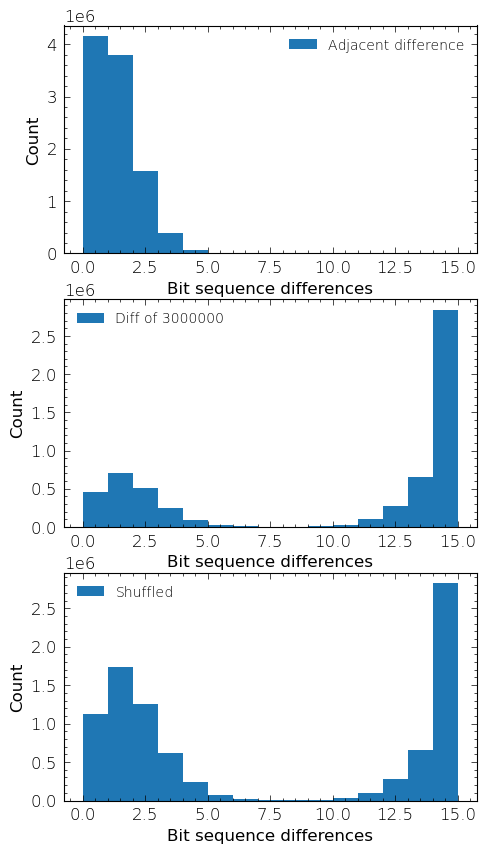

In the findings below, I found that for the checkerboard pattern with a degenerate checkerboard pattern, the autocorrelation time becomes very large, and increases dramatically for larger values of $\beta$. The degenerate checkerboard patterns occur for even width grids, where the checkerboard pattern with the top left being 1 has the same energy, and thus is equally and very likely, as the checkerboard pattern with the top left being 0.

For $\beta=0.1$
* For $\Delta=0.5$, it is mostly uncorrelated after 20-30 iterations
* For $\Delta=1.1$, it is mostly uncorrelated after 200-300 iterations
* For $\Delta=2.7$, it is mostly uncorrelated after ~50,000 iterations

For $\beta=0.16$
* For $\Delta=2.7$, it is mostly uncorrelated after ~500,000-1,000,000+ iterations

For $\beta=0.19$
* For $\Delta=2.7$, it is mostly uncorrelated after ~3,000,000+ iterations (can't fully test with this approach)

For $\beta=1.0$
* For $\Delta=0.5$, it is mostly uncorrelated after 20-30 iterations
* For $\Delta=1.1$, it is mostly uncorrelated after ~800 iterations
* Fpr $\Delta=2.7$, it is mostly uncorrelated after 30-40 iterations

For the checkerboard pattern, the autocorrelation time is too large (larger than $10^7$) so the state becomes non-ergotic for even reasonably somewhat high temperatures. 

## Relating energy with $\beta$ and average occupation

As what could be expected, the energy of the system increases with temperature. And likewise, the more energy the more atoms will be in the excited Rydberg state. This is a reasonable approach for estimating the temperature though it doesn't completely answer our question of whether estimating the noise can be modelled with the Gibbs state. Nonetheless, I wanted to plot how these variables could related to each other. In practice, we could then calculate the average occupation and use that to measure the temperature. We can also get an estimate of how the temperature will change based on how the energy changes; if a state is in the ground state, then its temperature will be indistinguishable from any state that is in the ground state.

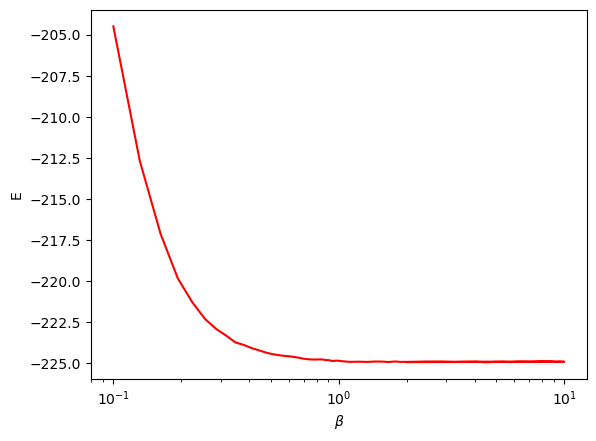
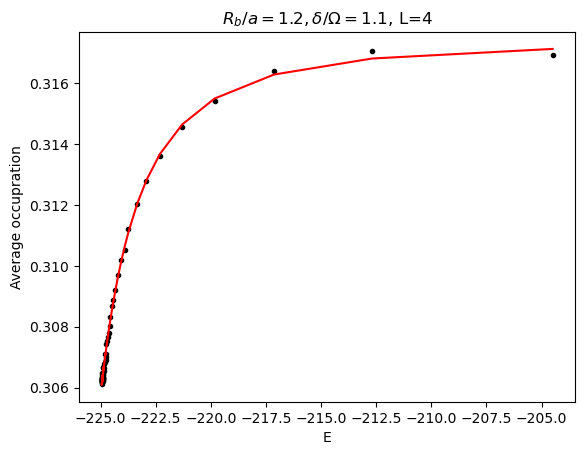

I fitted the average occupation to the energy with a polynomial with a negative power.

# Probability distribribution for $\Delta=0.5$ and $R_b=1.2$

/project/6000317/jkambulo/code/qc-temp/transformer


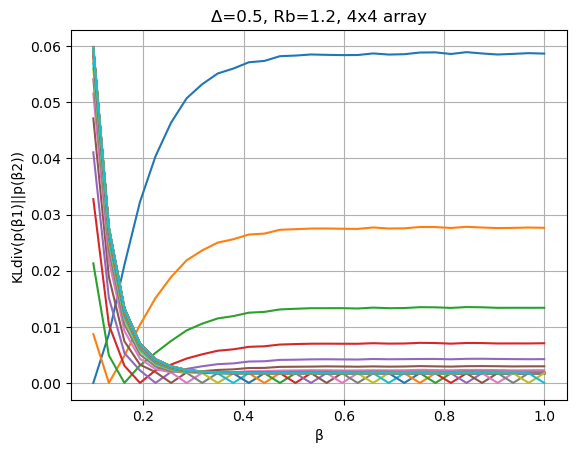

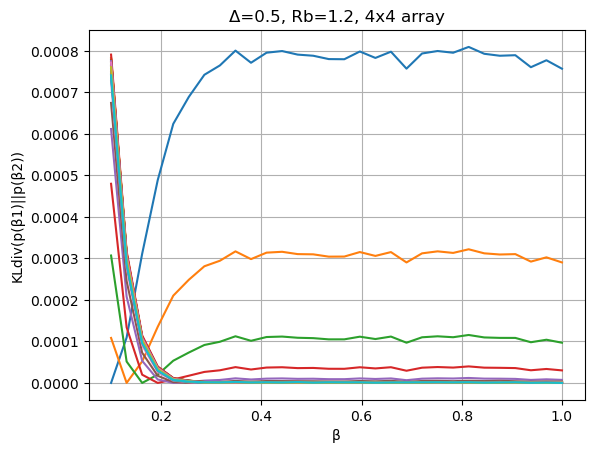

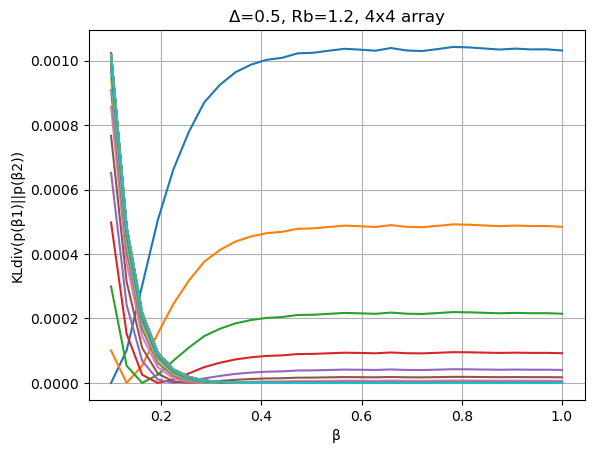

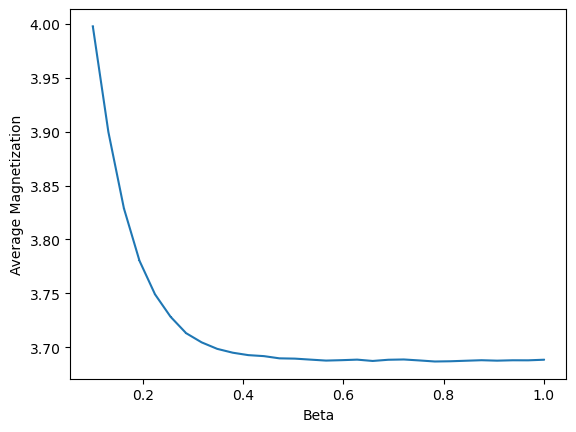

0.21878000000000003 +- 4.6773924359625845


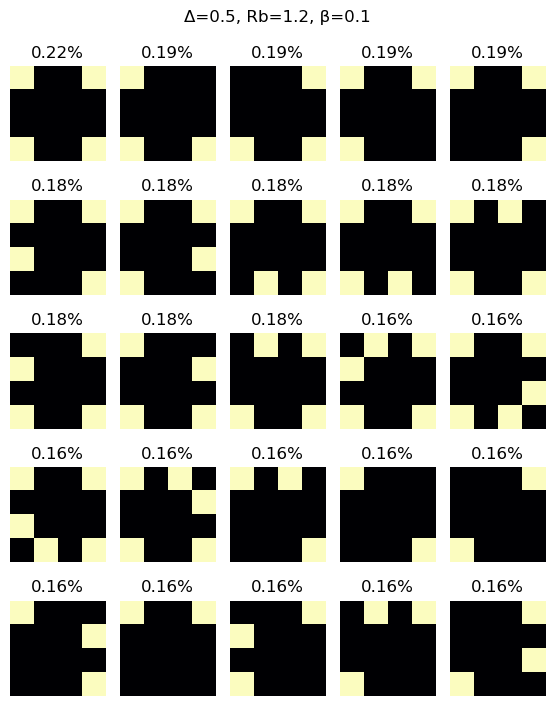

0.31824 +- 5.641276451300716


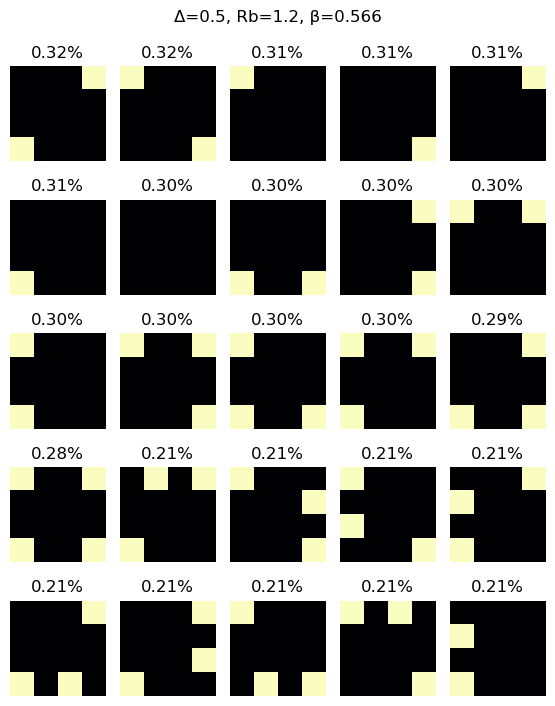

0.31757 +- 5.635334950116098


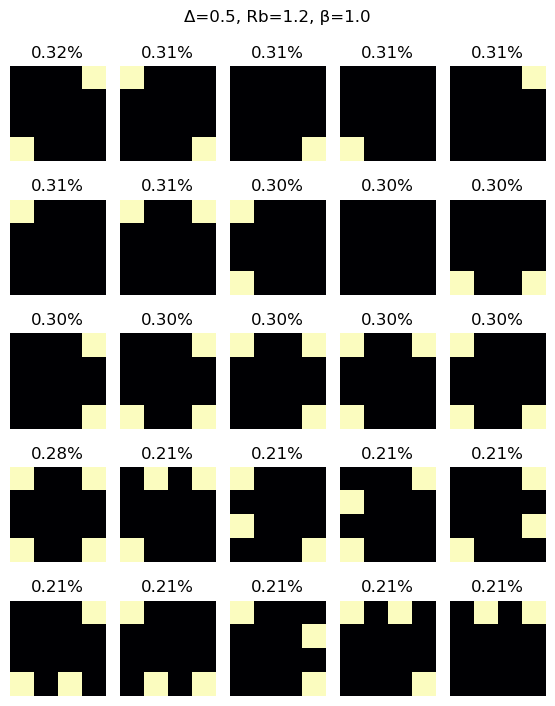

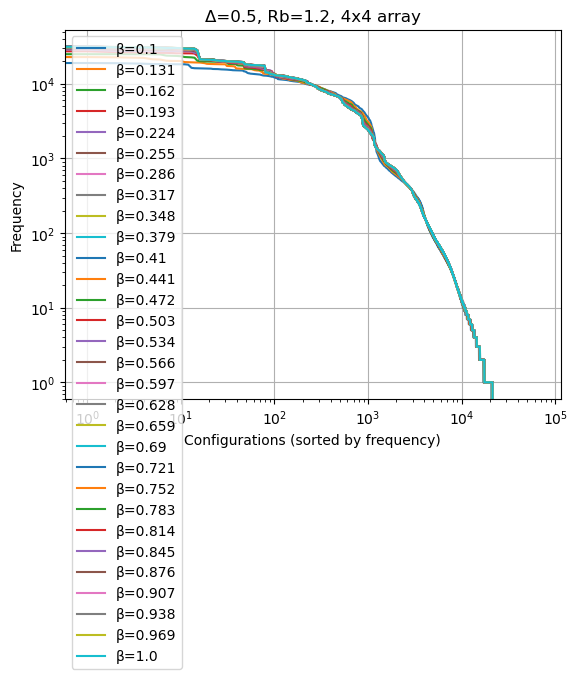

In [ ]:

%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 0.5
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
(bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)
plot_KLdiv([hist/nsamples for hist in hist_list], beta_list, delta)
plot_KLdiv([op_count/nsamples for op_count in op_counts], beta_list, delta)
plot_KLdiv([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta)
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization)
plt.ylabel('Average Magnetization')
plt.xlabel('Beta')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)


Observations
* For $\Delta=0.5$ (disordered state)
    * low $\beta$ values have their most frequent states being less common (2% compared to 1%), with the probabilities spread out to more states. This is expected since higher temperatures allow more states to be possible
    * Some of the most common states for all $\beta$ values are when the corners are filled, where higher temperatures want more corners to be filled (4 for low $\beta$, and 2 opposite corners for high $\beta$).
    * For low temperatures, common states are when few are filled. As the frequency drops, more and more atoms are put in. Filling up the corners in different permutations. The first state where atoms start a checkerboard pattern is when there are three atoms
    * For higher temperatures, higher number of atoms are more frequent than fewer. Small checkerboard patterns are much more frequent here.
    * The number of states that are possible are around the same for each temperature
    * The states which exist for increasing $\beta$ start being roughly the same. Small $\beta$ values have very different states than higher $\beta$ values, but $\beta$ changing from 0.5 to 1 doesn't have much of a change.
    
KL divergences
* For $p(\text{configuration})$
    * Plots don't have much noise going from one $\beta$ value to the next
    * KL divergence doesn't approach zero, except for when the datasets are identical (if this was a different seed, I would expect the KLdiv to be normal)
    * Plot looks quite like the p(1 or 0) plot except shifted up.
* For $p(\text{order})$
    * Plots have a significant amount of noise from one $\beta$ to the next
    * KL divergence does none-the-less approach 0 because of number statistics
    * In this case, the plot looks like the 0s and 1s KL divergece, but doesn't seem to always be the case
* For $p(\{0,1\})$
    * KL divergence approaches 0 because of number statistics
    * Curve is smooth
    * This means that just the amount of 0s and 1s (so long as it doesn't reach the ground state) is capable of identifying the state.

Magnetization vs temperature
* This plot shows that using the average number of excited atoms, you can get a reasonable estimate of the temperature. However, this doesn't show that the error can be characterized as a temperature, only that if there was a temperature it would be the one found here. 

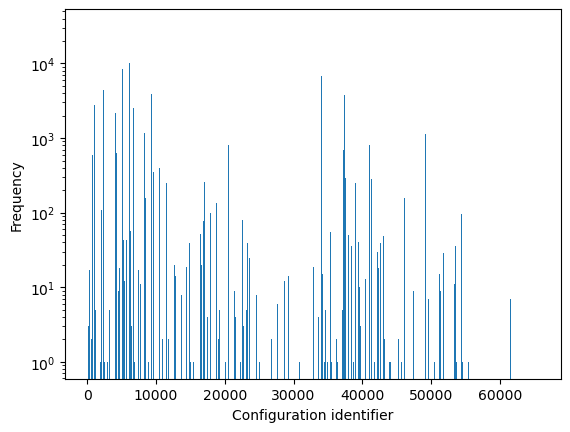

In [ ]:
plt.bar(bins[:-1], hist_values)
plt.yscale('log')
plt.xlabel('Configuration identifier')
plt.ylabel('Frequency')
plt.show()

# Probability distribribution for $\Delta=1.1$ and $R_b=1.2$

/project/6000317/jkambulo/code/qc-temp/transformer


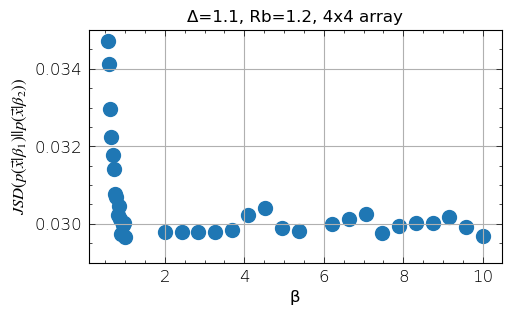

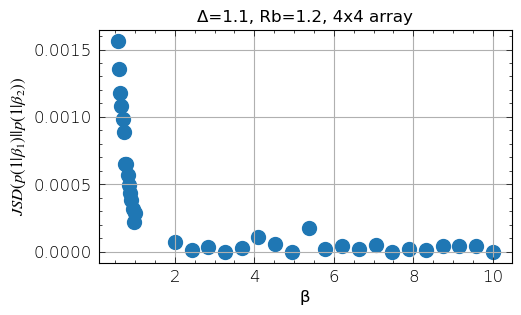

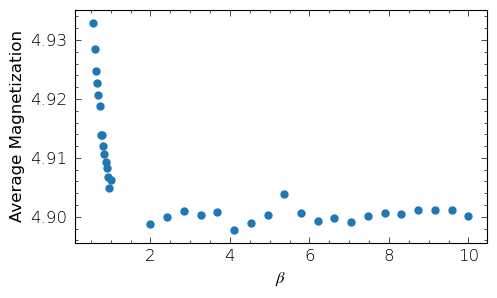

0.62244 +- 7.889486675316714


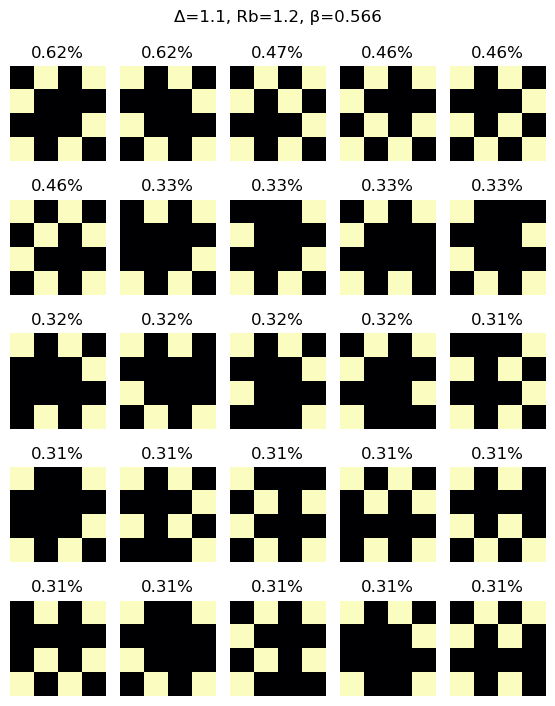

0.56102 +- 7.490126834707141


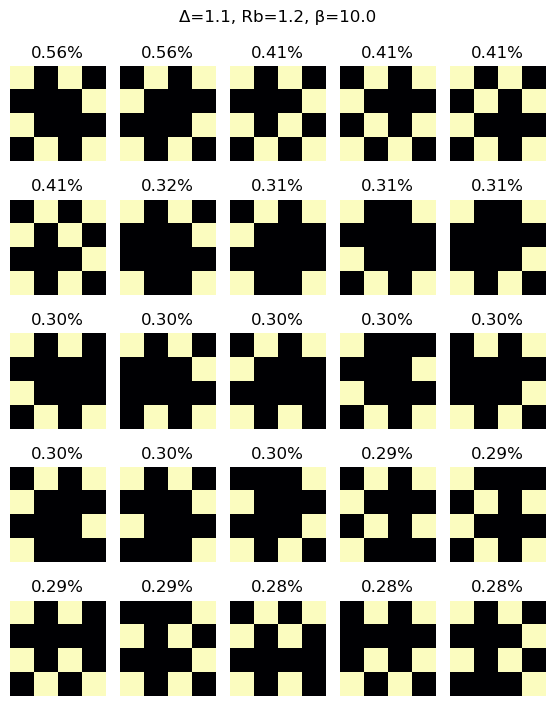

0.56061 +- 7.487389398181452


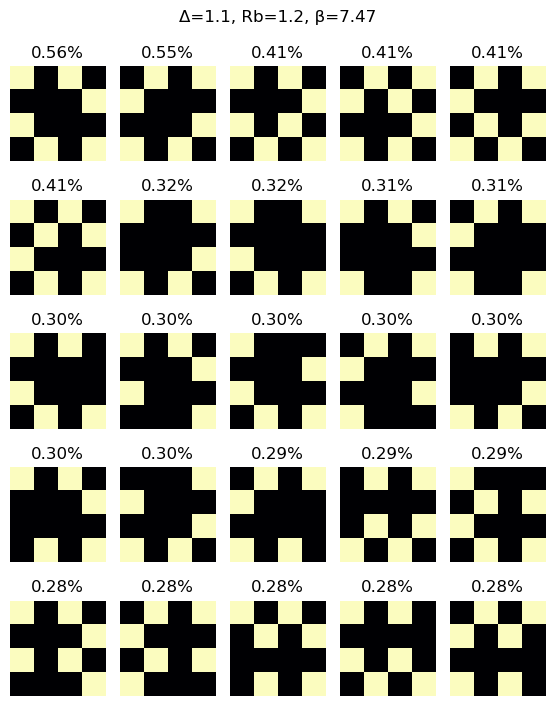

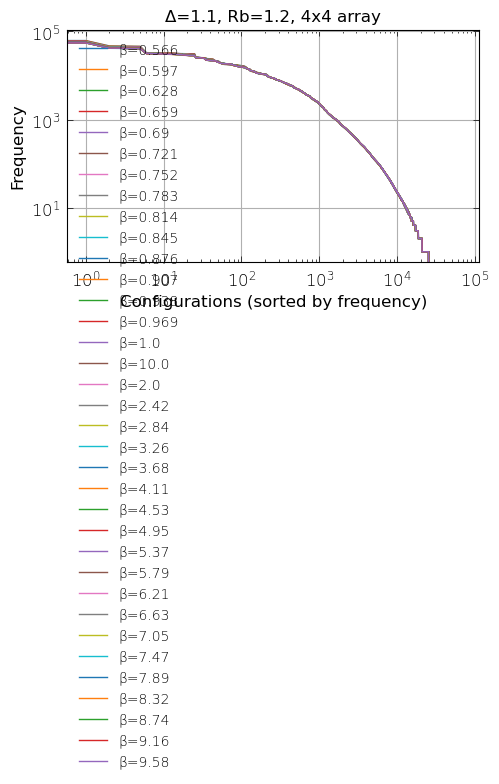

In [27]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 1.1
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset, dataset_slice=slice(15,None))
plot_JSD(hist_list, beta_list, delta, slice(25,26),show=False)
plt.ylabel(r"$JSD(p(\vec{x}|\beta_1) || p(\vec{x}|\beta_2))$")
plt.ylim([0.029,0.035])
plt.show()
# plot_JSD(op_counts, beta_list, delta)
plot_JSD([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta, slice(15,16),show=False)
plt.ylabel(r"$JSD(p(1|\beta_1) || p(1|\beta_2))$")
plt.show()
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization, fmt='.')
plt.ylabel('Average Magnetization')
plt.xlabel(r'$\beta$')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)

In [17]:
len(beta_list), len(hist_list), len(op_counts)
print(op_counts)

(array([2441755, 4076289, 2354618,  904894,  199798,   21652,     979,
            15]), array([2442897, 4074738, 2355511,  904559,  199687,   21538,    1054,
            16]), array([2442135, 4070293, 2356663,  907173,  201030,   21607,    1082,
            17]), array([2441568, 4074496, 2354759,  906115,  200766,   21262,    1016,
            18]), array([2439145, 4073756, 2355975,  907048,  201144,   21852,    1058,
            22]), array([2435790, 4067088, 2360511,  910727,  202897,   21939,    1035,
            13]), array([2436657, 4069045, 2358548,  909760,  203120,   21831,    1024,
            15]), array([2437476, 4069707, 2357655,  910624,  201899,   21548,    1076,
            15]), array([2436959, 4066047, 2360344,  910660,  203121,   21820,    1039,
            10]), array([2431992, 4068555, 2358777,  913251,  204241,   22128,    1042,
            14]), array([2438904, 4066048, 2358387,  909766,  203722,   22147,    1011,
            15]), array([2436391, 4068208, 235663

# Probability distribribution for $\Delta=2.7$ and $R_b=1.2$

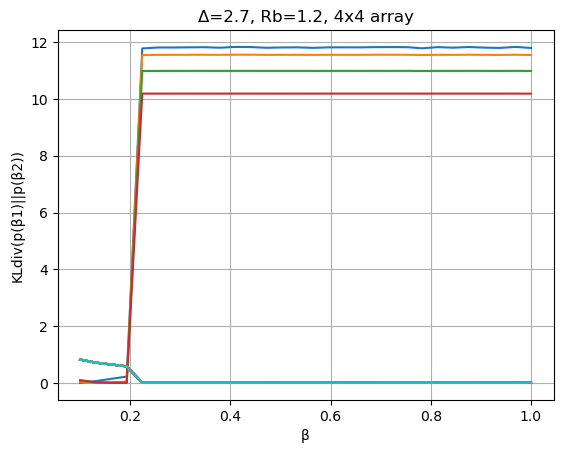

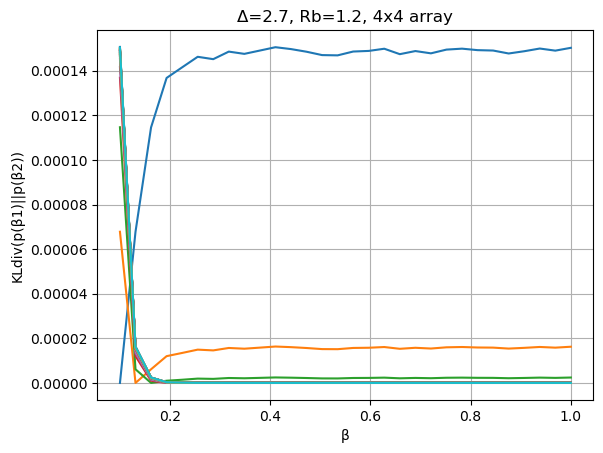

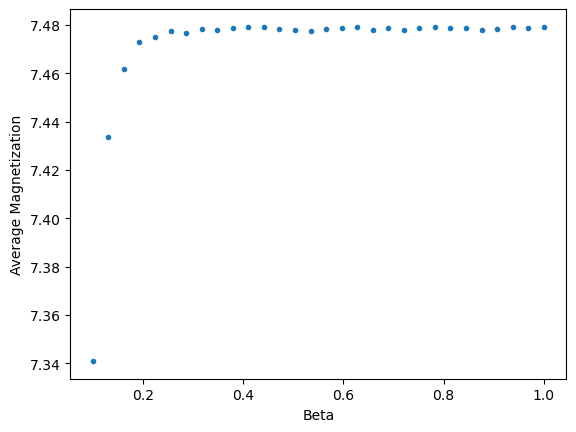

18.98909 +- 43.5764730101003


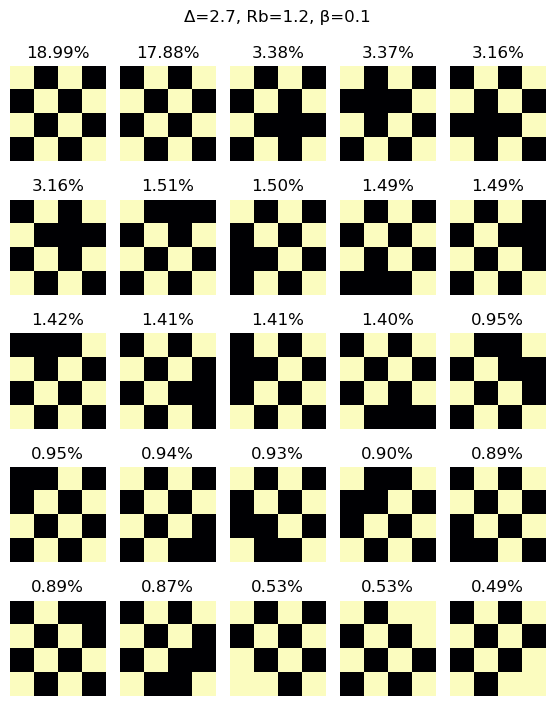

45.87302 +- 67.72962424227673


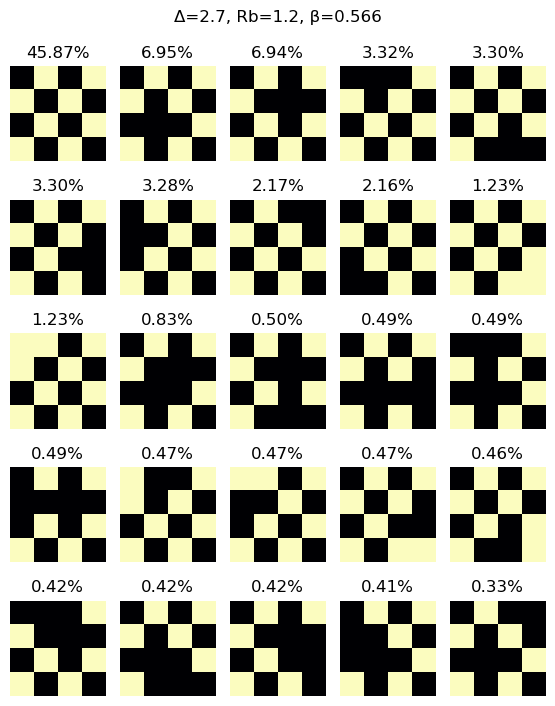

45.93559 +- 67.77579951575636


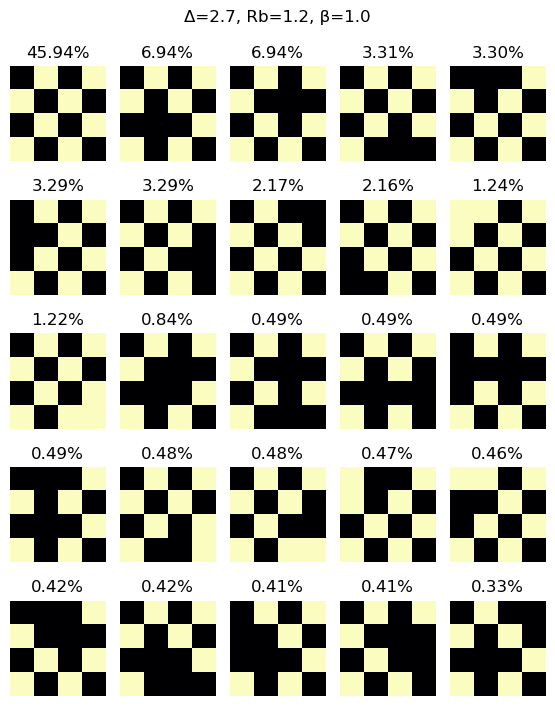

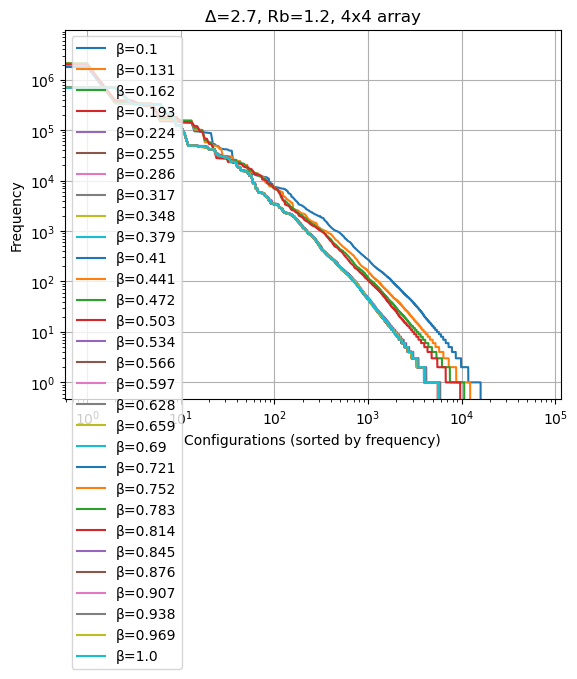

In [ ]:
# %cd /project/6000317/jkambulo/code/qc-temp/transformer
# from dataloader import QCTempDataset
# import matplotlib.pyplot as plt
# import numpy as np
# delta = 2.7
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

# nsamples = dataset.get_nsamples()
# natoms = dataset.get_natoms()
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)

plot_KLdiv([(hist+0.00001)/np.sum(hist+0.00001) for hist in hist_list], beta_list, delta)
# plot_KLdiv([op_count/nsamples for op_count in op_counts], beta_list, delta)
plot_KLdiv([np.array([1-av/natoms,av/natoms]) for av in average_magnetization], beta_list, delta)
plt.errorbar(beta_list, average_magnetization, yerr=std_av_magnetization, fmt='.')
plt.ylabel('Average Magnetization')
plt.xlabel('Beta')
plt.show()
for k in [0, 15, 29]:
    plot_common_configurations(hist_list[k]/nsamples, beta_list[k], sorted_indices[k], dataset.get_natoms(), delta)
plot_sorted_hist(hist_list,beta_list, sorted_indices, delta)




* In the checkerboard pattern, the ground state is reached at relatively high temperatures ($\beta=0.2$)
* For higher temperatures, the inverse full checkerboard pattern is equally common as the normal full checkerboard pattern. However, for lower temperatures, the inverse full checkerboard pattern becomes statistically infavorable.

If the temperature of the quantum computer doesn't depend on the Hamiltonian, then to find the temperature even when it is very low, we will want to find a state where the ground state is at a very low temperature. From these results, have a really large $\Delta$ makes the ground state have a very high temperature. Low $\Delta$ values have a somewhat high ground state temperature. The critical point seems to have the lowest ground state temperature. 

1. I want to make a plot of ground state temperature vs $\Delta/\Omega$ at $R_b=1.2$
    1. What do you consider the ground state temperature?
2. I want to have some error bars for the KL divergence to see, what the minimum number of samples are required to be confident about what the temperature is.
    

## Error of estimating Temperature

/project/6000317/jkambulo/code/qc-temp/transformer
1.2277777777777779
1.6384931255169337 1.0943067405937725


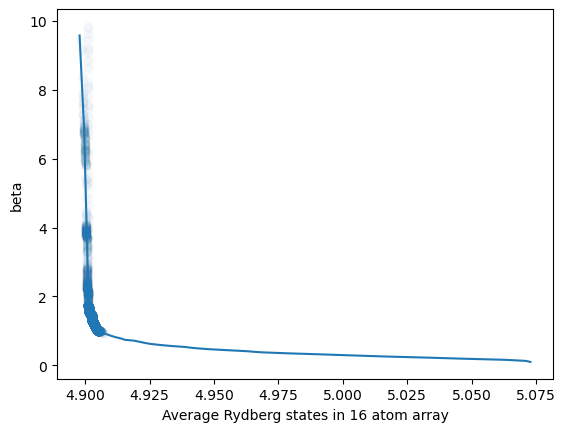

In [5]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
# from scipy.interpolate import make_interp_spline
# from dataloader import QCTempDataset
# import matplotlib.pyplot as plt
# import numpy as np
# delta = 1.1
# dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=delta)

nmeasurements = 1e6
# nsamples = dataset.get_nsamples()
# magnetization = [np.sum(data)/nsamples for data in dataset.datasets]
# f = make_interp_spline(sorted(magnetization), dataset.beta[::-1],k=1) # I'm sorting to make it monotonically increasing (just an estimate)
x=np.linspace(min(magnetization),max(magnetization),100)
plt.plot(x, f(x))
print(dataset.beta[32])
samples = np.random.normal(loc=np.sum(dataset.datasets[32])/nsamples,
                           scale=np.std(np.sum(dataset.datasets[5],axis=0))/np.sqrt(nmeasurements), 
                           size=(10000,))
plt.scatter(samples, f(samples), alpha=0.01, marker='o')
plt.ylabel('beta')
plt.xlabel("Average Rydberg states in 16 atom array")
result = f(samples)
print(np.mean(result),np.std(result))

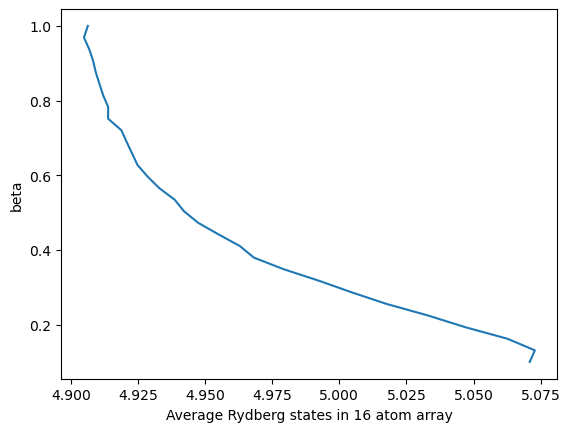

In [ ]:
# the actual plot, if I didn't sort it. 
plt.plot(magnetization, dataset.beta)
plt.ylabel('beta')
plt.xlabel("Average Rydberg states in 16 atom array")
plt.show()

The $\beta$ accuracy depends on the $\beta$ value which the quantum computer looks like. High $\beta$ values (low temperatures) will have lower accuracy.
| Measurements | Worse case accuracy | Best case accuracy |
| --- | --- | --- |
| $10^4$ | bad | 0.027 |
| $10^5$ | 0.09 | 0.0086 |
| $10^6$ | 0.030 | 0.0027 |
| $10^7$ | 0.010 | 0.0008 |

In [ ]:
from scipy.spatial.distance import jensenshannon
# (bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)
# plot_KLdiv([hist/nsamples for hist in hist_list], beta_list, delta, slice(0,-1,5))

x = np.arange(2**16)
i1, i2 = -3, -5
size1 = 7
size2 = 6
p_dist = hist_list[i1]/np.sum(hist_list[i1])
p_dist2 = hist_list[i2]/np.sum(hist_list[i2])
print(beta_list[i1], beta_list[i2])
print(jensenshannon(p_dist, p_dist2))
samples = 8
jsd = np.zeros((samples))
for i in range(samples):
    p1 = np.histogram(np.random.choice(x[:-1],p=p_dist, size=(10**size1,), replace=True), bins=x, density=True)[0]
    p2 = np.histogram(np.random.choice(x[:-1],p=p_dist2, size=(10**size2,), replace=True), bins=x, density=True)[0]
    jsd[i] = jensenshannon(p1, p2)
    
print(rf"| $10^{size1}$ | $10^{size2}$ | {beta_list[i1]:.3f} | {beta_list[i2]:.3f} | ${np.mean(jsd,axis=0):.4f} \pm {np.std(jsd, axis=0):.4f}$ |" )



0.9379310344827586 0.8758620689655172
0.026401281936247186
| $10^7$ | $10^6$ | 0.938 | 0.876 | $0.0567 \pm 0.0002$ |


If we have a dataset of size $N_1$ with $\beta_1$ and we calculate the JSD with another dataset of size $N_2$ and $\beta_2$, these are the expected ranges we can expect (we would recalculate for the $\beta$ value we measure). If when numberically comparing the experimental data with simulated data for the corresponding $\beta$ and they exceed the JSD range of what would be expected when the $\beta$ values are the same, then the distribution doesn't look enough like that temperature.

| $N_1$ | $N_2$ |$\beta_1$ | $\beta_2$ | JSD |
| --- | --- | --- | --- | --- |
| $10^7$ | $10^6$ | 0.224 | 0.193 | $0.0629 \pm 0.0002$ |
| $10^7$ | $10^6$ | 0.224 | 0.224 | $0.0560 \pm 0.0003$ |
| $10^7$ | $10^6$ | 0.224 | 0.255 | $0.0621 \pm 0.0002$ |
| $10^7$ | $10^5$ | 0.224 | 0.193 | $0.1360 \pm 0.0004$ |
| $10^7$ | $10^5$ | 0.224 | 0.224 | $0.1335\pm 0.0004$ |
| $10^7$ | $10^5$ | 0.224 | 0.255 | $0.1365 \pm 0.0007$ |
| $10^7$ | $10^5$ | 0.224 | 1.000 | $0.1463 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.100 | 1.000 | $0.1777 \pm 0.0007$ |
| $10^7$ | $10^4$ | 0.224 | 0.193 | $0.2849 \pm 0.0013$ |
| $10^7$ | $10^4$ | 0.224 | 0.224 | $0.2852 \pm 0.0010$ |
| $10^7$ | $10^4$ | 0.224 | 0.255 | $0.2880 \pm 0.0010$ |
| $10^7$ | $10^4$ | 0.224 | 1.000 | $0.2912 \pm 0.0016$ |
| $10^7$ | $10^4$ | 0.100 | 1.000 | $0.3093 \pm 0.0022$ |
| $10^7$ | $10^5$ | 0.969 | 0.938 | $0.1388 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.969 | 0.969 | $0.1376 \pm 0.0005$ |
| $10^7$ | $10^5$ | 0.969 | 1.000 | $0.1384 \pm 0.0004$ |
<!-- | $10^6$ | $10^6$ | 0.224 | 0.193 | $0.0765 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.224 | 0.224 | $0.0711 \pm 0.0001$ |
| $10^6$ | $10^6$ | 0.224 | 0.255 | $0.0758 \pm 0.0001$ |
| $10^6$ | $10^6$ | 0.969 | 0.938 | $0.0764 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.969 | 0.969 | $0.0725 \pm 0.0003$ |
| $10^6$ | $10^6$ | 0.969 | 1.000 | $0.0765 \pm 0.0003$ | -->


# Measuring temperature for large $\beta$

In [ ]:
%cd /project/6000317/jkambulo/code/qc-temp/transformer
from dataloader import QCTempDataset
delta = 1.2
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.1, delta_per_omega=delta)

nsamples = dataset.get_nsamples()
natoms = dataset.get_natoms()
(bins, hist_list), (order_params, op_counts), (average_magnetization, std_av_magnetization), sorted_indices, beta_list = compute_histograms(dataset)

/project/6000317/jkambulo/code/qc-temp/transformer


0.9001699999999999 +- 9.487728916869411


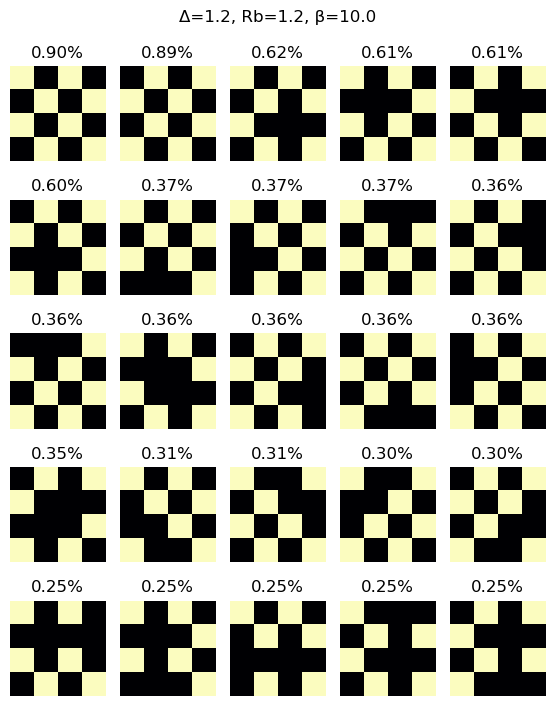

0.90493 +- 9.512780876273773


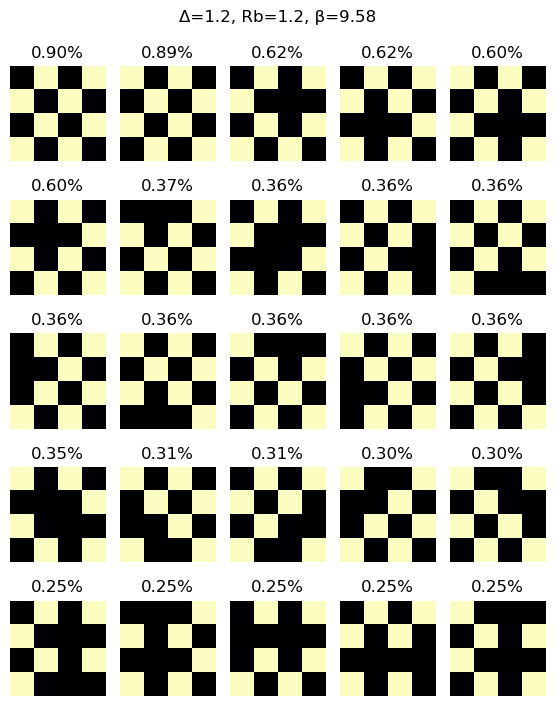

In [ ]:
plot_common_configurations(hist_list[0]/nsamples, beta_list[0], sorted_indices[0], dataset.get_natoms(), delta)
plt.show()
plot_common_configurations(hist_list[-1]/nsamples, beta_list[-1], sorted_indices[-1], dataset.get_natoms(), delta)

/tmp/ipykernel_24365/779593906.py:76: RuntimeWarning: invalid value encountered in sqrt
  print(f"{freq*100} +- {np.sqrt(freq)*100}")


-0.01408 +- nan


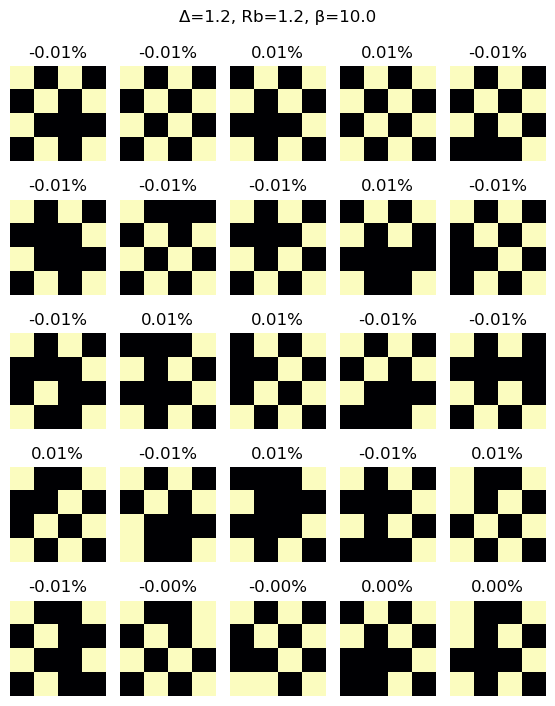

In [ ]:
vals = hist_list[4] - hist_list[0]
i = np.argsort(np.abs(vals))
plot_common_configurations(vals/nsamples, beta_list[0], i, dataset.get_natoms(), delta)
plt.show()

In [ ]:
p_dist = hist_list[0]/nsamples
x = np.arange(2**16)
size1 = 7

# iters = 20
# p = np.zeros((iters, len(x)-1))
# for i in range(iters):
#     p1 = np.histogram(np.random.choice(x[:-1],p=p_dist, size=(10**size1,), replace=True), bins=x, density=True)[0]
#     p[i] = p1

print(np.mean(p, axis=0))
print(np.std(p, axis=0)/np.mean(p, axis=0))
print(1/np.sqrt(hist_list[0]))

[1.2105e-05 4.0585e-05 2.0080e-05 ... 0.0000e+00 0.0000e+00 0.0000e+00]
[0.12057949 0.04796368 0.0609648  ...        nan        nan        nan]
[0.09166985 0.0496904  0.07071068 ...        inf        inf        inf]


/tmp/ipykernel_7869/4098821192.py:12: RuntimeWarning: invalid value encountered in divide
  print(np.std(p, axis=0)/np.mean(p, axis=0))
/tmp/ipykernel_7869/4098821192.py:13: RuntimeWarning: divide by zero encountered in divide
  print(1/np.sqrt(hist_list[0]))


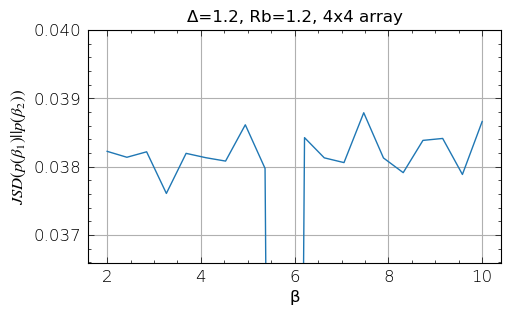

In [ ]:
plot_JSD(np.roll(hist_list,-1), np.roll(beta_list,-1), delta, show=False,beta_of_interest=slice(9,10))
plt.ylim([0.0366, 0.04])
plt.show()

In [ ]:
dataset = QCTempDataset("/home/jkambulo/projects/def-rgmelko/jkambulo/data/qc-temp", size=(4,4), Rb_per_a=1.2, delta_per_omega=1.1)

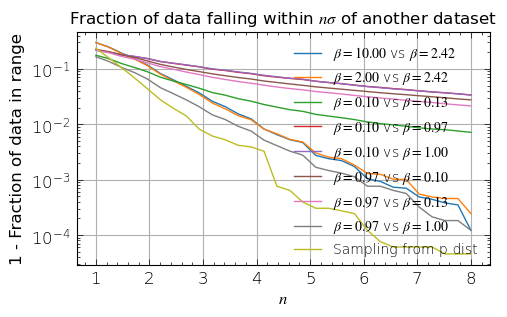

In [ ]:
from scipy.special import erf
from scipy.stats import poisson
import numpy as np

data = dataset.datasets
natoms = dataset.get_natoms()
f = lambda x: np.sum(x*(2**np.arange(natoms))[None], axis=1)
ncomb = 2**natoms

bins = np.arange(ncomb)
hist_list2 = [np.histogram(f(d[:].T), bins=bins)[0] for d in [data[0],data[1], data[-2],data[-1]]]
beta_list2 = [dataset.beta[0], dataset.beta[1],dataset.beta[-2], dataset.beta[-1]]

j = 2

mu = 300
nstd_list = np.linspace(1,8,30)
for i in range(2):
    data = []
    for nstd in nstd_list:
        # print(f'std = {nstd}')
        # print(erf(nstd/np.sqrt(2)))
        # print(poisson(mu).cdf(mu+nstd*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd*np.sqrt(mu)))
        data.append(1-np.sum(((hist_list[i] - nstd*np.sqrt(hist_list[i]) <= hist_list[j]) &
                    (hist_list[j] <= hist_list[i] + nstd*np.sqrt(hist_list[i]))) |
                    (hist_list[i] == 0))/(2**16-1))
        # print(data[-1])
        # print('-'*100)
    plt.plot(nstd_list, data, label=rf'$\beta={beta_list[i]:.2f}$ vs $\beta={beta_list[j]:.2f}$')

for i in [0,2]:
    for j in [k for k in range(4) if k!=i]:
        data = []
        for nstd in nstd_list:
            data.append(1-np.sum(((hist_list2[i] - nstd*np.sqrt(hist_list2[i]) <= hist_list2[j]) &
                        (hist_list2[j] <= hist_list2[i] + nstd*np.sqrt(hist_list2[i]))) |
                        (hist_list2[i] == 0))/(2**16-1))
            
        plt.plot(nstd_list, data, label=rf'$\beta={beta_list2[i]:.2f}$ vs $\beta={beta_list2[j]:.2f}$')

# plt.plot(nstd_list[:12], 1-erf(nstd_list[:12]/np.sqrt(2)), label='Erf')
plt.plot(sample_nstd_list, sample_data, label='Sampling from p dist')
# plt.plot(nstd_list, 1-(poisson(mu).cdf(mu+nstd_list*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd_list*np.sqrt(mu))), label='Poisson')
plt.xlabel(r"$n$")
plt.ylabel("1 - Fraction of data in range")
plt.title(r'Fraction of data falling within $n\sigma$ of another dataset')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

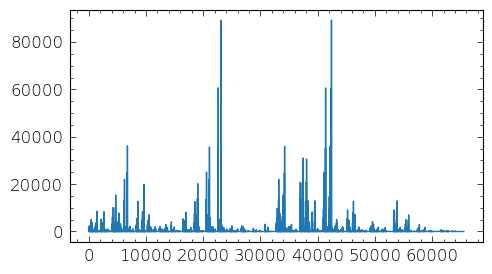

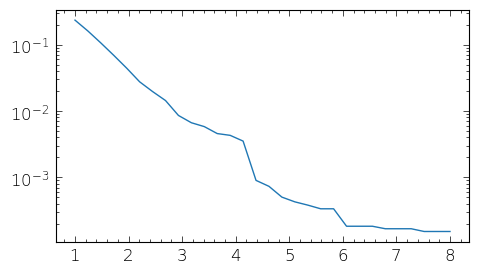

In [ ]:
x = np.arange(2**16)
dist = sum(hist_list)/len(hist_list)/nsamples

sample = np.random.choice(x[:-1], size=(nsamples,), p=dist)
dist *= nsamples
sample = np.histogram(sample, bins=x)[0]
plt.plot(x[:-1], sample)
plt.show()
sample_data = []
sample_nstd_list = np.linspace(1,8,30)
for nstd in sample_nstd_list:
    # print(f'std = {nstd}')
    # print(erf(nstd/np.sqrt(2)))
    # print(poisson(mu).cdf(mu+nstd*np.sqrt(mu)) - poisson(mu).cdf(mu-nstd*np.sqrt(mu)))
    sample_data.append(1-np.sum(((dist - nstd*np.sqrt(dist) <= sample) &
                (sample <= dist + nstd*np.sqrt(dist))) |
                (dist == 0))/(2**16-1))
# plt.plot(x,dist)
# plt.xlim([950,1050])
plt.plot(sample_nstd_list, sample_data)
plt.yscale('log')

In [120]:
import numpy as np
import tensornetwork as tn
import scipy as sp
import time
import pickle
import matplotlib.pyplot as plt

D = 16 # bond dimension of the MPS
N = 64 # number of spins in the system
J = 1.0 # interaction parameter
B = 1 # magnetic field strength
Jx = J * np.ones(N-1) # vector of interactions, one per spin-pair
Bz = B * np.ones(N) # local magnetic fields per spin
ising_mpo = tn.FiniteTFI(Jx, Bz, dtype=np.float64) # an MPO representation of the Hamiltonian for the TFI
mps = tn.FiniteMPS.random(D = [D]*(N-1), d = [2] * N, dtype=np.float64) # an initial random MPS

mps.position(0) # move the center of orthogonality to the first site of the chain

dmrg = tn.FiniteDMRG(mps, ising_mpo) #DMRG interface
dmrg.run_one_site(num_sweeps = 4, verbose=1, precision=1E-10) # run DMRG optimization

print()
sz = np.diag([-1,1]) # pauli-z operator
sx = np.array([[0,1],[1,0]]) # pauli-x operator
sz_obs = measure_local(mps,sz) # list of observables
plt.plot(sz_obs)

# Characterizing noise of Acquila data (11x11)
Anna Knorr gave me QuEra Acquila data to work with. After some analysis, I found the following about them
1. In each file (C_2D_star_XX.json/.results) contains 200 shots with a single Hamiltonian. 
2. Different files vary the Hamiltonian only by varying the atomic distance $a$. The first file has $a=4\mu m$ and the following file increments this by $0.1$, leading to the 36th file having $a=4+(36-1)*0.1=7.5 \mu m$
3. Beyond the interatomic distance, each Hamiltonian is specified by a time-dependent tuning parameter and Rabi frequency for adiabatic evolution (the phase parameter is left as zero). The Hamiltonian can be generated with the following julia code:
```julia
t = [0,2.5,2.75,3]
Δ = piecewise_linear(clocks = t, values = 8.75*[-2pi,-2pi,2pi,2pi])
Ω = piecewise_linear(clocks = t, values = 2.5*[0,2pi,2pi,0])
ϕ = piecewise_linear(clocks = [0,3], values = [0,0])
a = 4
atoms = generate_sites(SquareLattice(), 11, 11, scale = a)
h = rydberg_h(atoms; Δ=Δ, Ω=Ω,ϕ=ϕ)
```
4. In the phase space, we have: $\Delta/\Omega = 3.5$ and $R_a/a=(C/\Omega)^{1/6}/a=(2π\times 862690/(2.5\times 2\pi))^{1/6}/4= 2.093$ (rhombic/star phase) to $R_a/a=(2π\times 862690/(2.5\times 2\pi))^{1/6}/7.5= 1.11$ (checkerboard phase).

# Steps to Characterizing Noise
1. Select a Hamiltonian near the critical point. 
    * This will have the largest variety of states (more than the disordered)
    * The ground state will occur at lower temperatures.
    * The "magnetization" will change the most steadily when you increase the temperature. This allows you calculate the temperature with reasonable accuracy.
2. Measure the number of rydberg states. If $10^5$ iterations are done, you can get an estimate of the temperature to an accuracy of $\pm 0.09$ in the worst case and $\pm 0.027$ in the best case.
3. Now that we know what the temperature should be, we want to know how the error compares to normal simulations with that temperature. 

# Acquila limitations
I recently found the newly released QuEra Acquila "documentation" outling various important parts of the quantum computer which we couldn't have known without working very closely with the quantum computer. It can be found [here](https://assets.website-files.com/643b94c382e84463a9e52264/648f5bf4d19795aaf36204f7_Whitepaper%20June%2023.pdf). 

An important fact that we found was size that Acquila would allow. Going in, I thought that the limitation of Acquila was that you could have only 256 atoms trapped and you had a very large amount of space. We can indeed use a maximum of 256, but it turns out that given the amount of room which we can fit the traps, for our purposes, it will have to be significantly less than this. For non-premium usage (I don't know what this entails), you can fit your atoms in a region of size $75 \mu m$ by $76 \mu m$. They also limit the minimum distance that you can place atoms to larger than $4\mu m$. Given the size of this region, you will be able to fit 16 atoms with an interatomic distance of $5\mu m$ or less. However this is not what we want, since we want to have $R_b/a\approx 1.2$, along the horizontal line crossing the checkerboard phase. This requires an interatomic distance of $\sim 7.5\mu m$ which would allow a maximum of an 11x11 grid (similar to what Anna Knorr did with Acquila previously).

This would mean that we cannot use a 4x4 grid of 4x4 atoms since we wouldn't have close to enough space. Instead the plan is to put 4 4x4 grids on the corners of the region to make all grids as far away as possible. We want them far away so that there isn't any interaction between the 4x4 grids since we want them to be indepedent of each other. This is how they would look for a reasonable (upper bound) interatomic distance of $7.5 \mu m$.

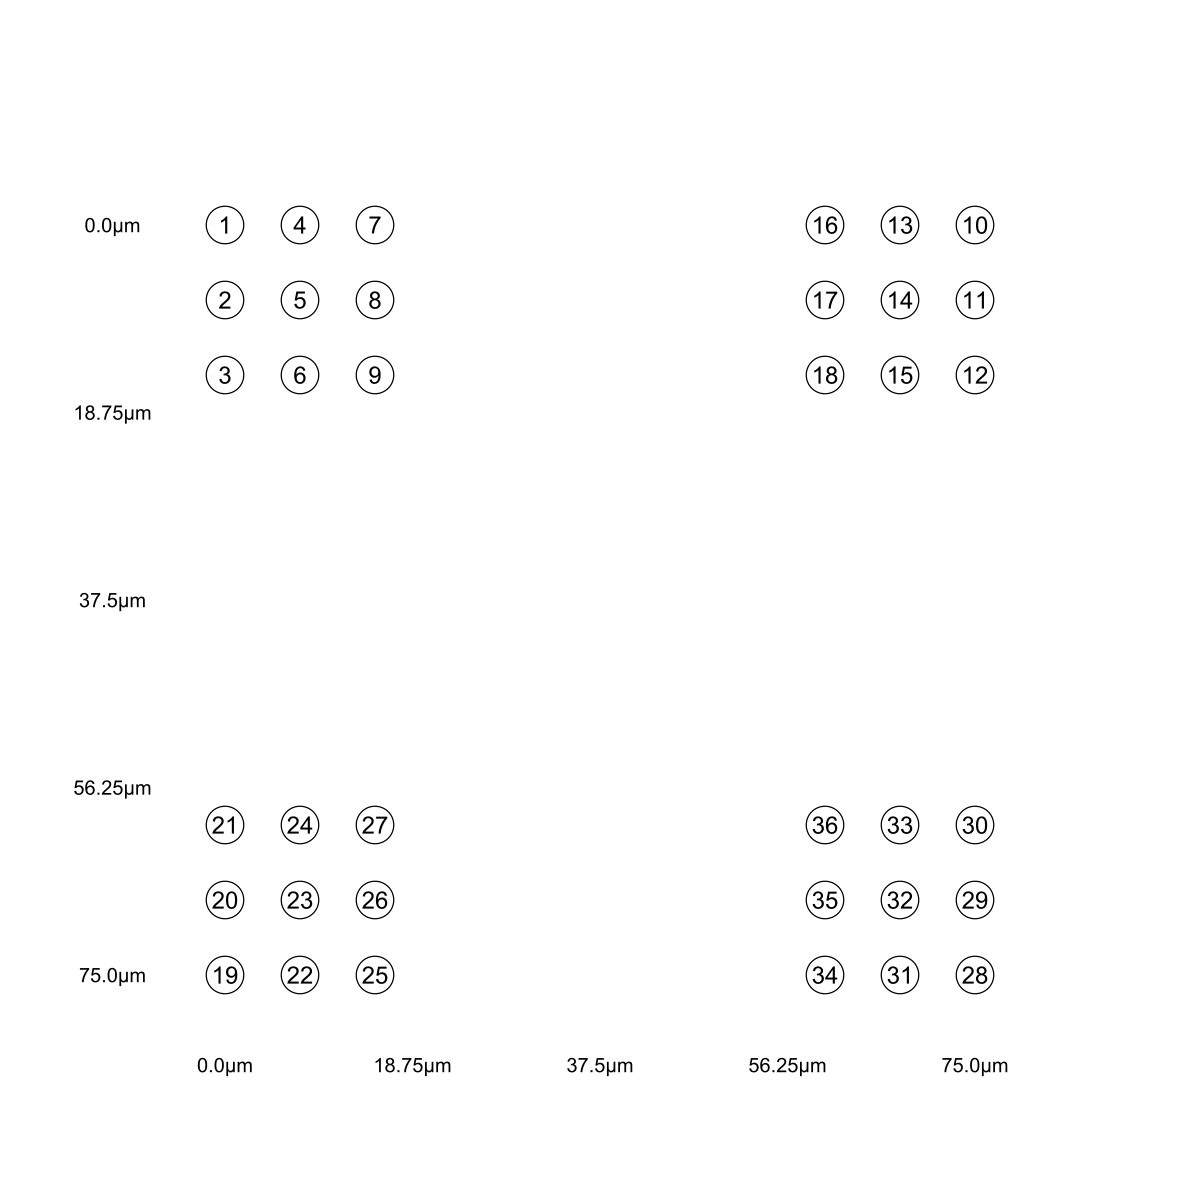

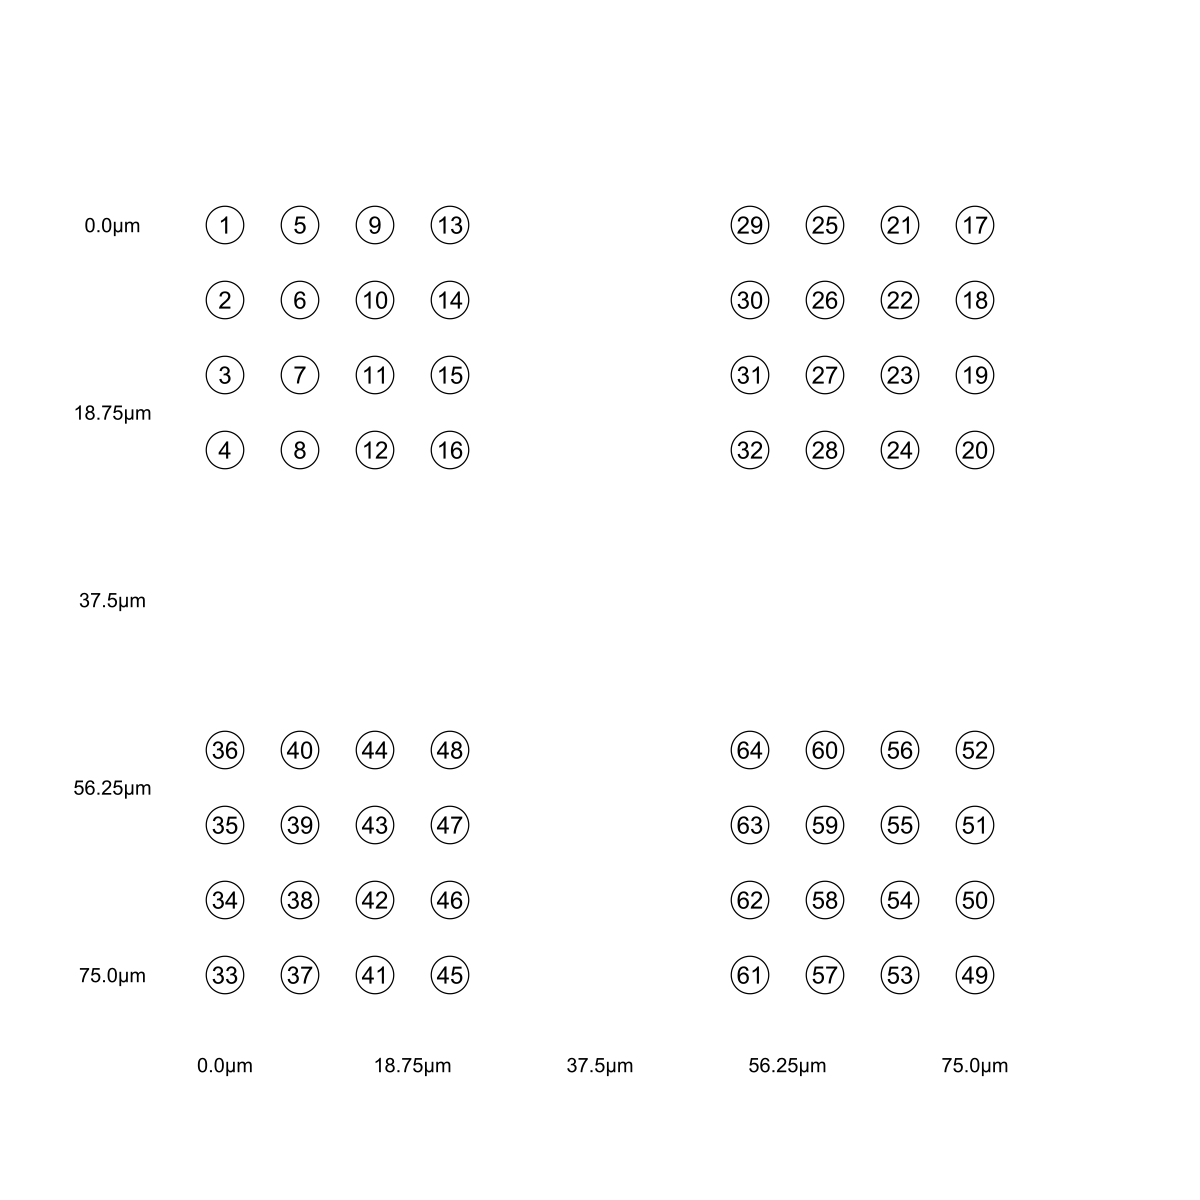

I ran QMC for these two atom configurations. For the 3x3 case, the most probable configurations looked as follows. Note that I reoriented the plots so that the top left atoms of the plot correspond to the top left atoms.

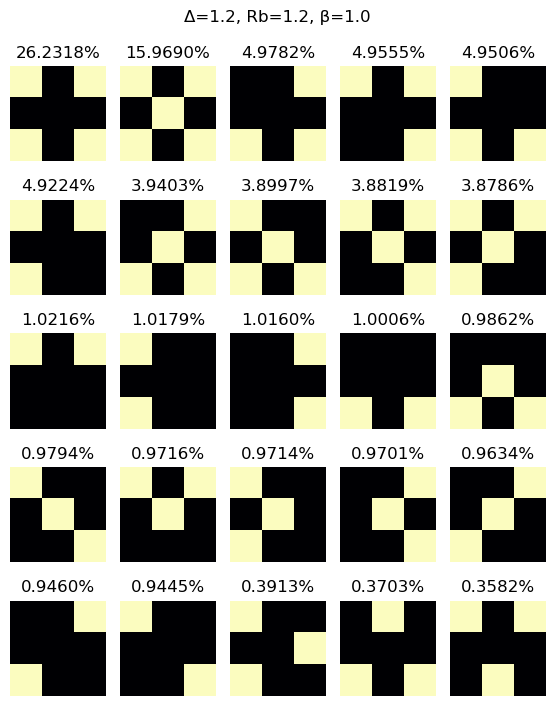
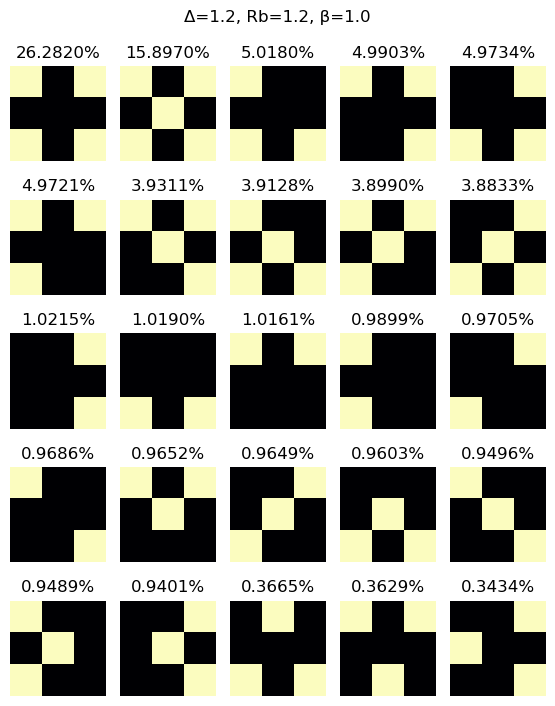
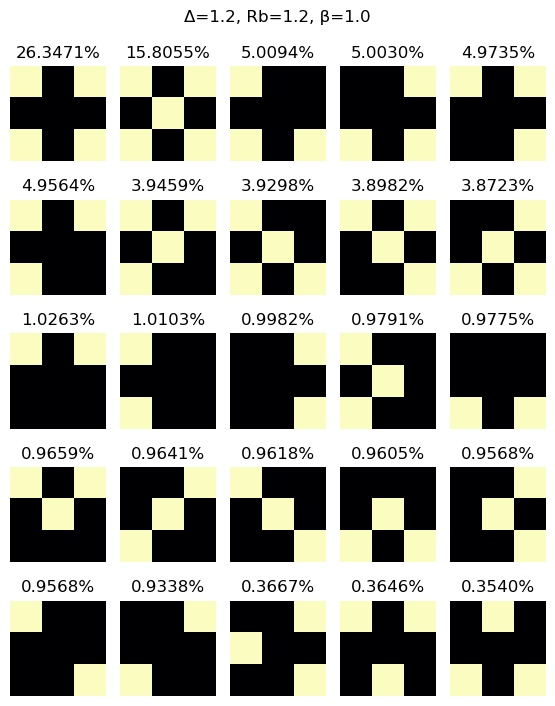
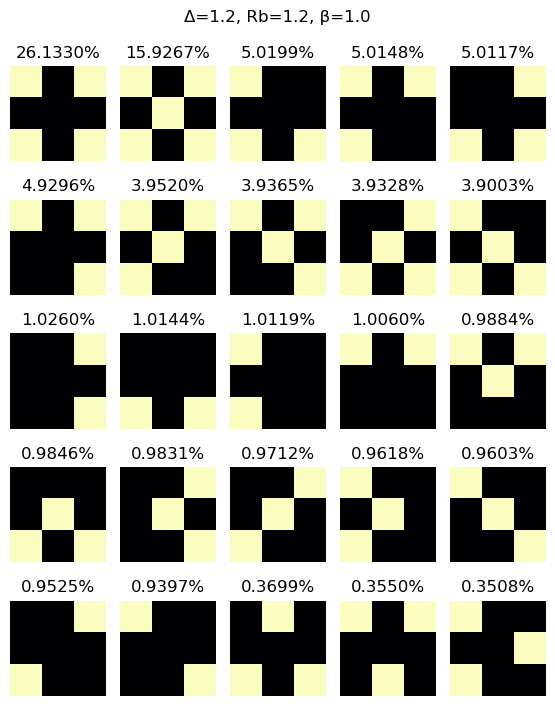

We note that there isn't any significant bias towards any specific side suggesting that the distance between the arrays is sufficient to have the arrays be independent. Any bias that might show up is masked by not having enough samples to precisely measure the exact probabilities. The observation applies for when the temperature is higher. When the temperature is higher, any biases are less noticeable due to more states being likely.

In the case of the 4x4 array, 

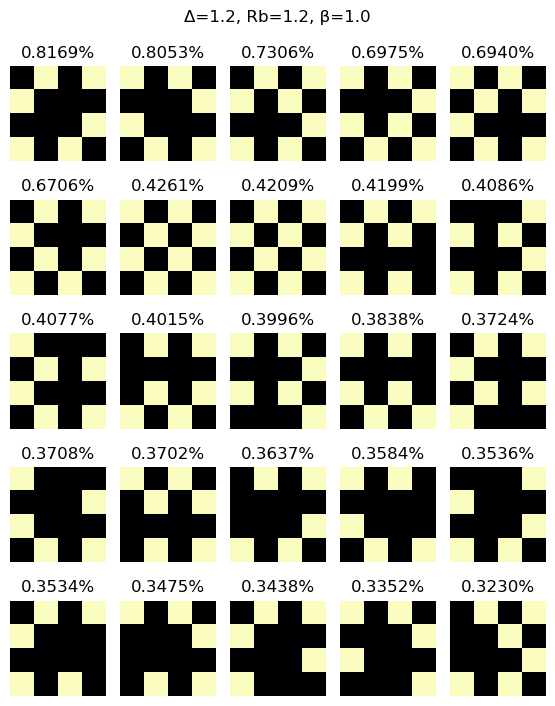
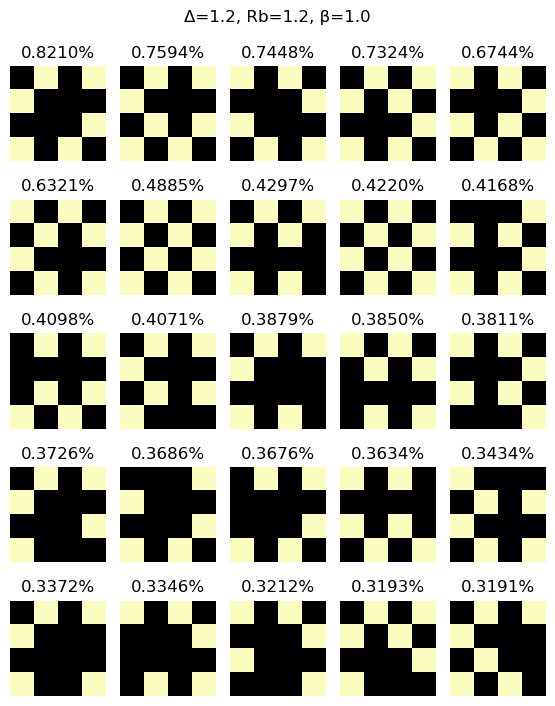
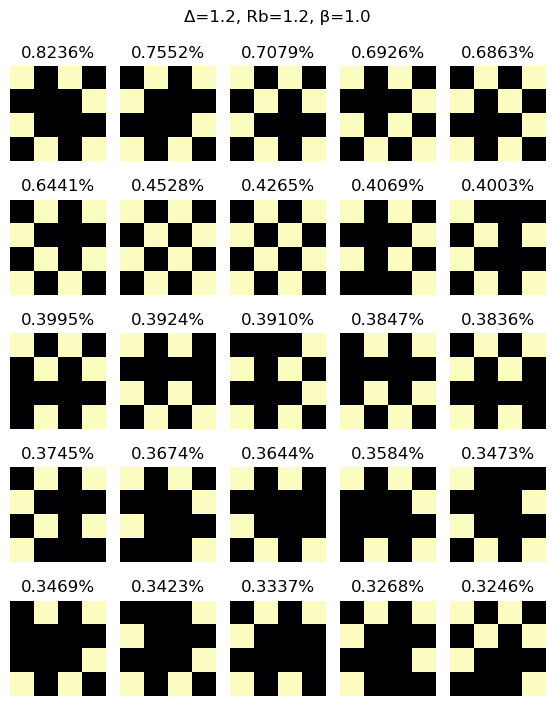
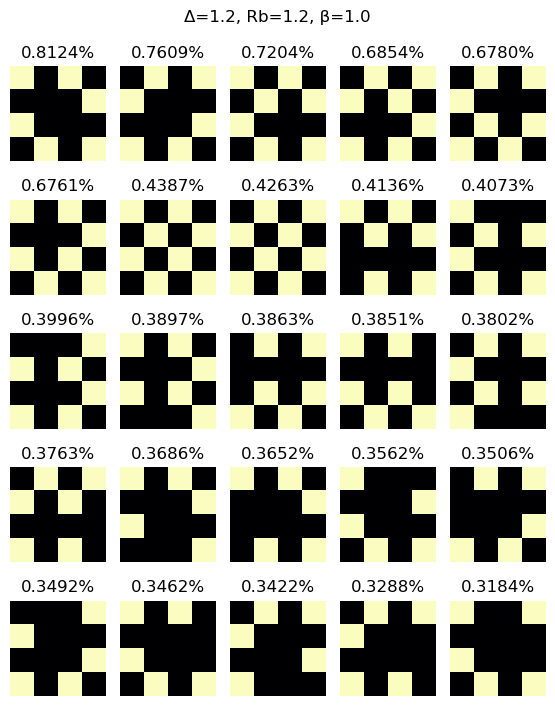

Similar to the 3x3 case, it seems like the bias is masked by the error generated by not sampling enough (here I sampled the four grids $10^6$ times)

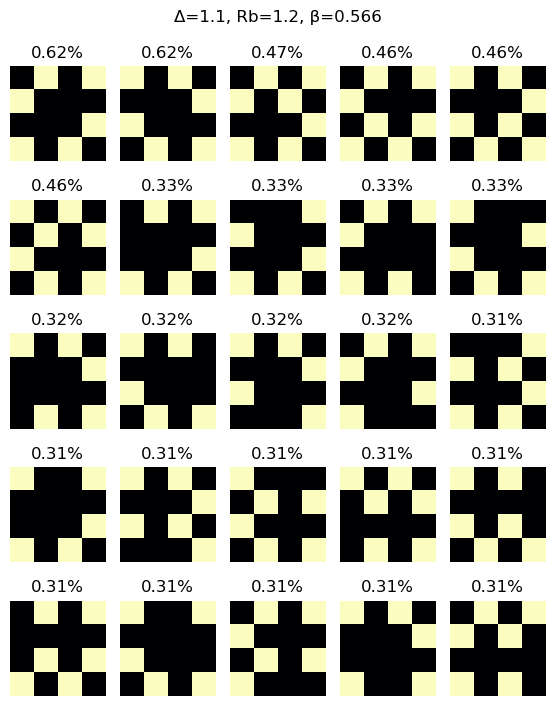

Some important values

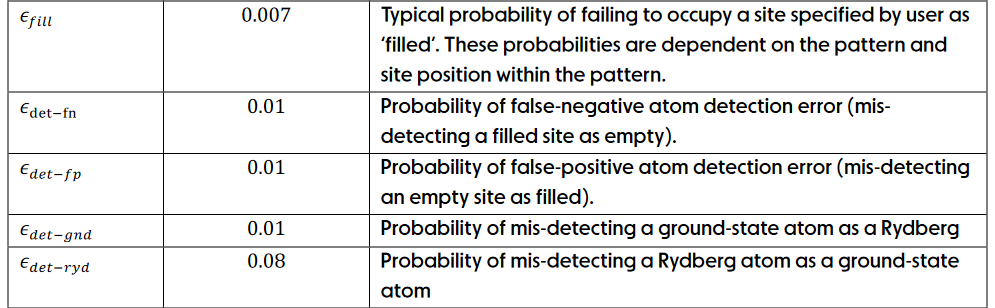

# Training transformer 

| Array shape | Embedding size | nhead | Full dataset |nlayers| 2d positional encoding| dim_feedforward | learning rate | Converged Loss  | Convergence iterations
| ----------- | -------------- | ----- | -------------|------|---------------------- | --------------- | --------------- | --------------- | ---------------------
| $(4,4)$     | 4              | 4     |        yes   | 5|        yes            | 2048            |0.001 | 0.4750-0.4820          | 3100 batches * 30
| $(4,4)$     | 8              | 8     | yes          |5| yes                   |  4000           |0.001|                 |
| $(4,4)$     | 4              | 4     |        yes   |5|        no            | 2048            |0.001|                 |
| $(4,4)$     | 4              | 4     |        yes   |5|        no            | 2048            | scheduler|                 |  
| $(4,4)$     | 3              | 3     |        yes   |5|        no            | 1024            | scheduler|                 |    
| $(4,4)$     | 4              | 4     |        yes   |8|        no            | 1024            | 0.001|                 |             


## Finding the temperature using a transformer
With a transformer trained on a constant point in phase space with a constant array size, but varying temperature, I decided to test out the original idea of generating data with a transformer and comparing that to real data. Given a sequence of data, the transformer can output the conditional probabilities of measuring that result given all the previous results, and multiplying all these probabilities together, we get the probability of the state.

$$P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta) = P(\sigma_1|\beta)P(\sigma_2|\sigma_1, \beta)P(\sigma_3|\sigma_2,\sigma_1,\beta)\cdots P(\sigma_N|\sigma_{N-1}\cdots \sigma_1, \beta)$$
$$P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta) = \prod_{i=1}^N P(\sigma_i |\sigma_{<i}, \beta)$$
Since the transformer can output $P(\sigma_i |\sigma_{<i}, \beta)$ and $P(\sigma_1, \sigma_2, \cdots, \sigma_N|\beta)$, I wanted to take some data $\mathcal{D}=\{\mathbf{x}_i\}$ and calculate the probability of measuring that data given some $\beta$ value. In theory the $\beta$ value in which the probability is maximized will be the temperature of the data (or the closest to).

Mathematically this is

$$\log \prod_{\mathbf{x}\sim \mathcal{D}} p(\mathbf{x})= \sum_{\mathbf{x}\sim \mathcal{D}} \log p(\mathbf{x})=N \sum_i q(\mathbf{x}_i) \log p(\mathbf{x}_i)$$

which is maximized when the KL divergence is minimized.

To test how well this approach performed, I took some data with an unknown $\beta$ value and used the transformer to calculate the probability of measuring what was measured (or rather the log of the probability to reduce rounding error). I then varied the $\beta$ which I inputted into the transformer to see which $\beta$ value gave the highest probability for that batch. The below plot is the result of this, where the vertical line is the $\beta$ value of the dataset and the x axis is the $\beta$ values which were inputted into the transformer. From my results, it seemed as though it does not consistently give a good answer, since there often ends up being no maxima. Though some times, a somewhat accurate $\beta$ value is obtained.
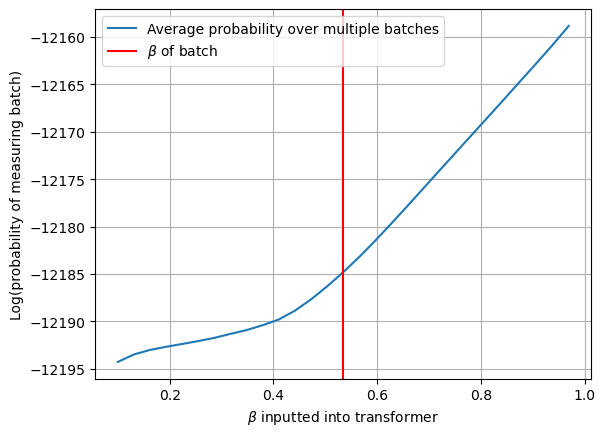
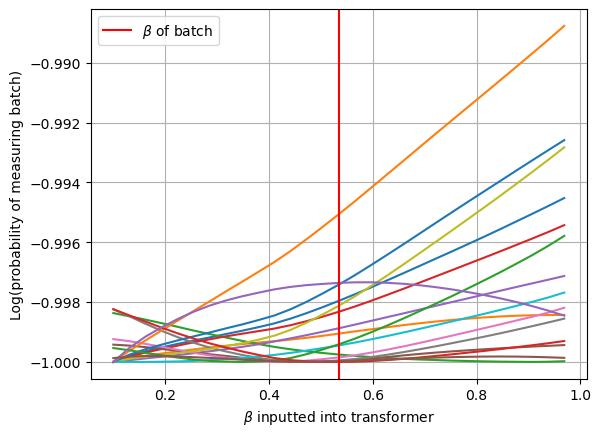

This can be done for more data to possibly obtain better results, though it's quite possible that it won't since the above results are quite similar to what is seen with a smaller dataset. However, the transformer takes a while to perform a lot of computations (without a gpu), simificantly longer than computing a histogram with real data and performing KL divergence on the probabilities. I will do further analysis on why this wouldn't work with this trained transformer later.

The corresponding plot with real data is what was done way earlier. A large amount of data is required, and the same applies for the transformer.

A way to compare the accuracy of the probability which the transformer outputs, is to compare it with what it should be for that configuration (at some $\beta$). In the figure below, for each configuration that appeared in the dataset, I plotted the output probability of the transformer against the probability calculated from the data.

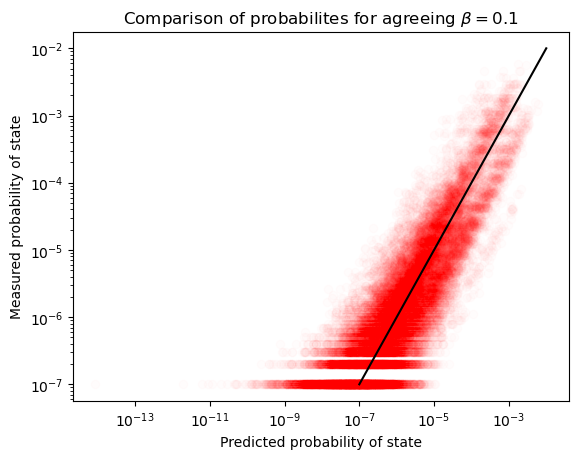

We notice that for any true probability, the transformer will output a probability that is within an order of 1 or 2 orders of magnitude from it. There is definitely a correlation, but it is very noisy. In the ideal case, these are perfectly correlated and we can use the transformer to exactly calculate the probilities, which we could then apply to larger datasets where the probabilities can't be calculated due to insufficient data. But with this trained model, this cannot be done accurately.

Another thing I noticed about the transformer is that is isn't as expressive about the temperature as it should. The probability for different states should change greatly when you greatly change the temperature, but the transformer doesn't reflect this. 

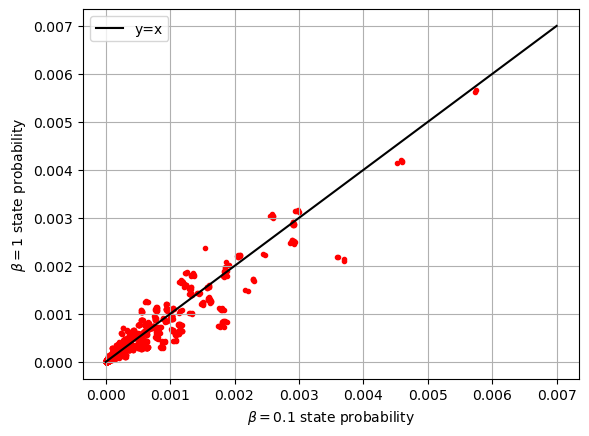

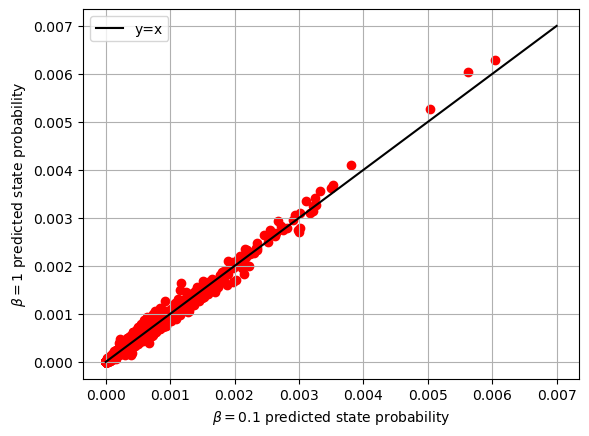

# Calculating energy of transformer
With the transformer, you can calculate the energy using the following formula
$$\langle E \rangle = \langle \psi \vert \mathcal{H} \vert\psi\rangle = \sum_{z,z'} \psi(z)\psi(z')\mathcal{H}_{z,z'}$$
$$=\sum_z |\psi(z)|^2\sum_{z'} \frac{\psi(z')}{\psi(z)}\mathcal{H}_{z,z'}$$
$$\mathcal{H}=\frac{\Omega}{2}\sum_i \sigma^x - \delta \sum_i n_i +\sum_{i<j} V_{ij} n_i n_j$$
$$\mathcal{H}_{z,z'}=\langle z \vert\mathcal{H}\vert z'\rangle=\bigg\{
    \begin{array}{lr}
        ||R_{k}-R_{i}||^{2}, & \text{if } i \neq k\\
        ||\triangle_{i}||^{2}, & \text{if } i\leq k
    \end{array}
$$
